# Forwarding simple expenditures regression estimate of bars on sales of tv ads

Story: Advertising data is used. We will investigate how TV advertisements affect sales.

## Kütüphanler

In [45]:
import pandas as pd
import numpy as np
df=pd.read_csv("Advertising.csv") # data set reading
df=df.iloc[:,1:len(df)]# made to not get the first index.
df.head()#first 5 lines

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Değişkenleri tiplerini kontrol ediyoruz.

In [4]:
df.info()# we are checking data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


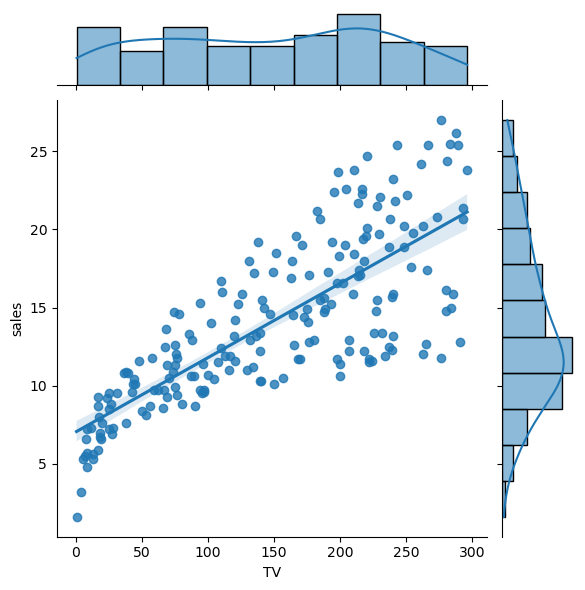

In [5]:
#JOINPLOT
import seaborn as sns
sns.jointplot(x="TV",y="sales",data=df,kind="reg");

tv satışları ile fiyaları arasındaki ilişki incelenmiştir. Tv fiyatları arttıkça satışların arttığı gözlemlenmiştir.Bu ilişkiyi modelleğimizde daha net bir sonuç alacağız.

In [6]:
from sklearn.linear_model import LinearRegression  #Library we will use for simple linear regression.

In [7]:
X=df[["TV"]] # only the tv variable is taken. taken as the independent variable.

In [9]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [10]:
y=df[["sales"]] # "sales" variable is taken as dependent variable.

In [11]:
reg=LinearRegression() # create model object

In [12]:
model=reg.fit(X,y) # the process of setting up the model

In [13]:
model

LinearRegression()

In [14]:
str(model)

'LinearRegression()'

In [15]:
dir(model) # is used to look at the information and parameters we can get from the model.

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [16]:
model.intercept_ # B0 ie intercept value received

array([7.03259355])

In [17]:
model.coef_ # We got our B1 coefficient, that is, it is the coefficient of Tv'variable in the model.

array([[0.04753664]])

In [18]:
#R2 value: the percentage of the dependent variable being explained by the independent variables.
model.score(X,y) # R2 value is taken.

0.611875050850071

## Guess

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


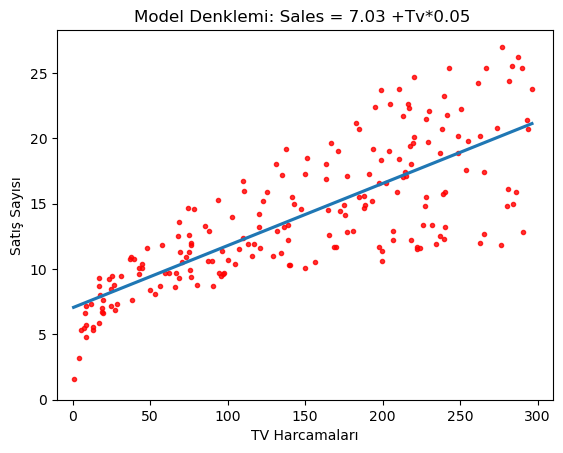

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
g= sns.regplot(df["TV"],df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 +Tv*0.05 ")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310) # given the range of the coordinate system
plt.ylim(bottom=0);


The model expressing the relationship is given above. Fixed value started from 7.03. That is the point where the blue regression line starts. This regression line represents the relationship between TV and sales.

Example: How much is my sales revenue when 165 units of TV are spent?

In [21]:
sales=model.intercept_+model.coef_*165
sales

array([[14.87613922]])

Answer: If 165 units of TV are spent, 14 sales will be realized.

### Scitlearn  kütüphanesi ile tahmin etmek

In [19]:
model.predict([[165]])

C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

Predicting different values at the same time

In [23]:
yeni_veri=[[5],[10],[30]]

In [24]:
model.predict(yeni_veri)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.27027675],
       [7.50795995],
       [8.45869276]])

## Residuals and Its Importance in Machine Learning

#### MSE: Mean Error Squares
#### RMSE: Root Mean Squared Error

Residuals: The differences between the actual values and the predicted values.

In [25]:
y.head()# denotes sales.

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [26]:
model.predict(X)[0:6] 

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [27]:
gercek_y = y[0:10]

In [29]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10]) # Saved by converting dataframe.

In [30]:
hatalar= pd.concat([gercek_y,tahmin_edilen_y], axis=1) # two dataframes merged.

In [32]:
hatalar.columns= ["gercek_y","tahmin_edilen_y"] # we named the columns.

In [36]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [40]:
hatalar["hata"]= hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [41]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


### MSE: Mean Error Squares

In [42]:
hatalar["hata_kareler"]=hatalar["hata"]**2

In [43]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [46]:
np.mean(hatalar["hata_kareler"])

9.290350329638102